# What is an AutoRegressive model?
An auto-regressive model is a simple model that predicts future performance based on past performance.
An AR model is a Linear Regression omodel that uses lagged variables as input(predictors). <br>

The equation for the AR model:

![Alt text](image-14.png)

Where: <br>
p - past values <br>
Yt - Function of different past values <br>
Ert - errors in time <br>
C - intercept


### Example

In [73]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_pacf

In [74]:
df = pd.read_csv('Datasets/daily-min-temperatures.csv')


In [75]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


#### Line plot of the dataset

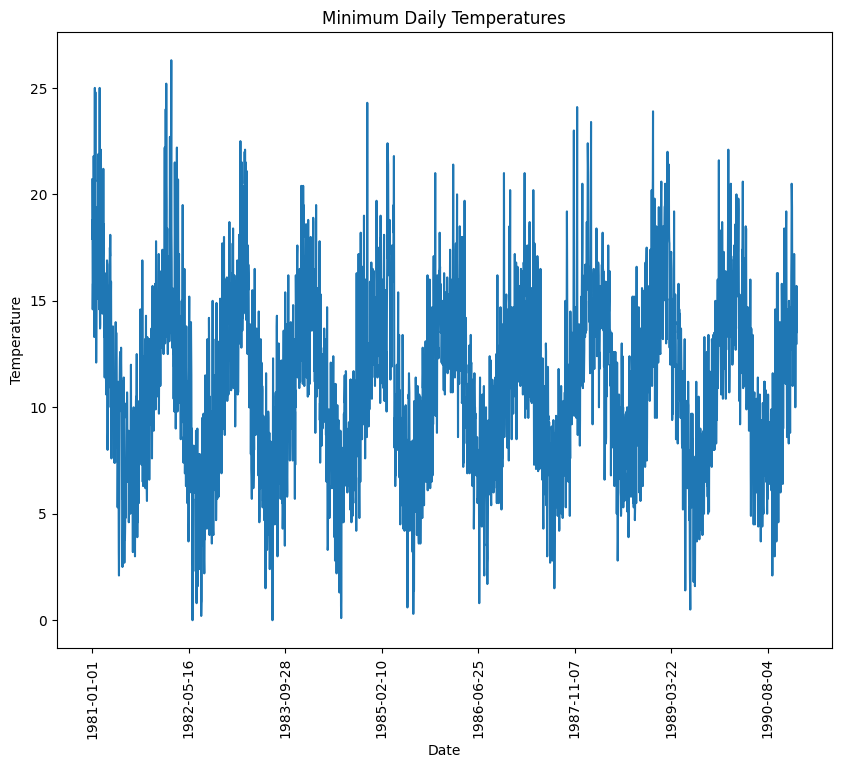

In [76]:
plt.figure(figsize=(10, 8))
plt.plot(df['Date'], df['Temp'])
#Graph Title
plt.title('Minimum Daily Temperatures')

#Naming the axis
plt.xlabel ('Date')
plt.ylabel ('Temperature')

#Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Use MaxNLocator to reduce the number of xticks
from matplotlib.ticker import MaxNLocator
locator = MaxNLocator(nbins=10)
plt.gca().xaxis.set_major_locator(locator)

plt.show()

#### Scatter Plot

In [79]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


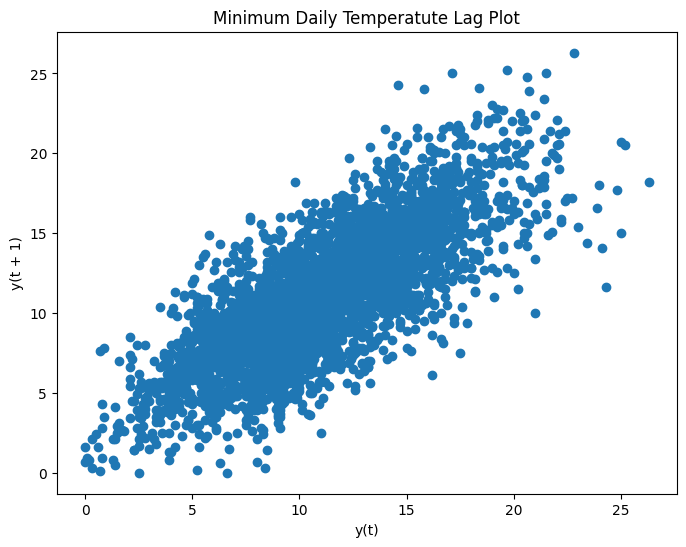

In [83]:
# Plot the lag plot using pandas
plt.figure(figsize=(8, 6))
pd.plotting.lag_plot(df['Temp'])
plt.title('Minimum Daily Temperatute Lag Plot')
plt.show()

**Explanation** <br>
One can observe a large ball of observations along a diagonal line of the plot. It clearly shows a relationship or some correlation.

#### Check for correlation using Pearson correlation coefficient

<Axes: >

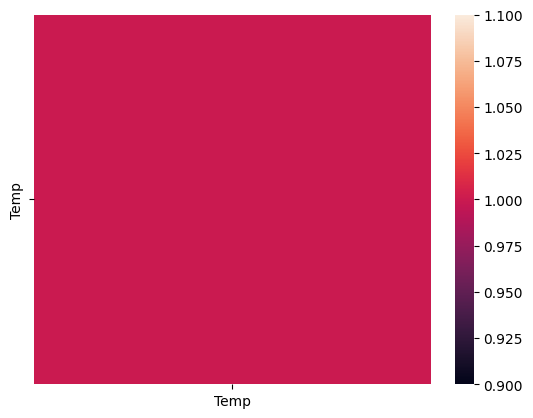

In [ ]:
import seaborn as sns 
correlation = df. corr ()  
sns. heatmap (correlation)  

**Explanation** <br>
This output provides valuable insights into the relationships between variables in your dataset. Positive values indicate positive correlations, negative values indicate negative correlations, and values close to 0 indicate little or no linear correlation between the variables.

#### Autocorrelation plots

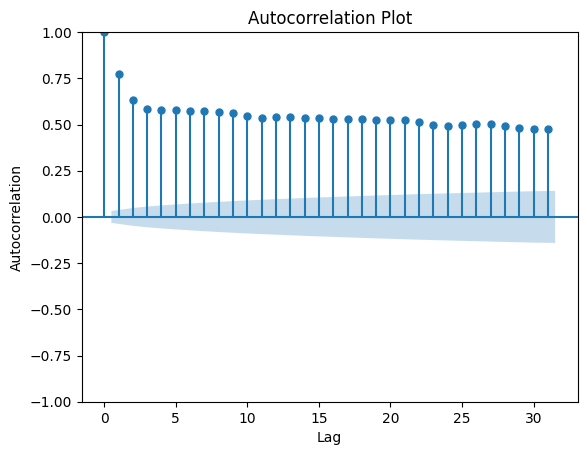

In [84]:
#Autocorrection plot of the time series
from statsmodels.graphics.tsaplots import plot_acf

# Calculate the ACF (via statsmodels)
plot_acf(df['Temp'], lags=31)

# Show the plot
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.show()

#### Autoregression Model

In [90]:
test.reset_index(drop=True, inplace=True)


In [91]:
print(test.index)

RangeIndex(start=0, stop=730, step=1)


In [95]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import train_test_split


# Split the data into train and test sets
train, test = train_test_split(df, test_size=0.2, shuffle=False)

# Train autoregression
lags = 29  # Choose the appropriate lag order based on model evaluation
model = AutoReg(train['Temp'], lags=lags)
fitted_model = model.fit()

# Make predictions
predictions = fitted_model.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Print predicted and expected values
for i in range(len(predictions)):
    print(f'Predicted = {predictions[i]:.2f}, Expected = {test["Temp"].iloc[i]:.2f}')


# Calculate Root Mean Squared Error (RMSE)
error = rmse(test['Temp'], predictions)
print(f'Root Mean Squared Error (RMSE): {error:.2f}')

# Plot results
plt.plot(test, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Autoregression Model - Test vs. Predictions')
plt.legend()
plt.grid(True)
plt.show()


c:\Users\gitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\gitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\gitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, Datetime

KeyError: 0

# Autoregressive Model vs Moving Average
An AR model isa method of future prediction based on past information while MA analyzes data by calculating a series of averages from a large dataset.

![Alt text](image-15.png)